In [2]:
from PIL import Image;
import numpy as np;
import skimage as ski;
from skimage import exposure;
from skimage import filters;
from skimage import morphology;
from skimage import feature;
from skimage import segmentation;

In [3]:
from matplotlib import pyplot as plt;

In [4]:
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['figure.figsize'] = [24,18]

(2200, 4854)


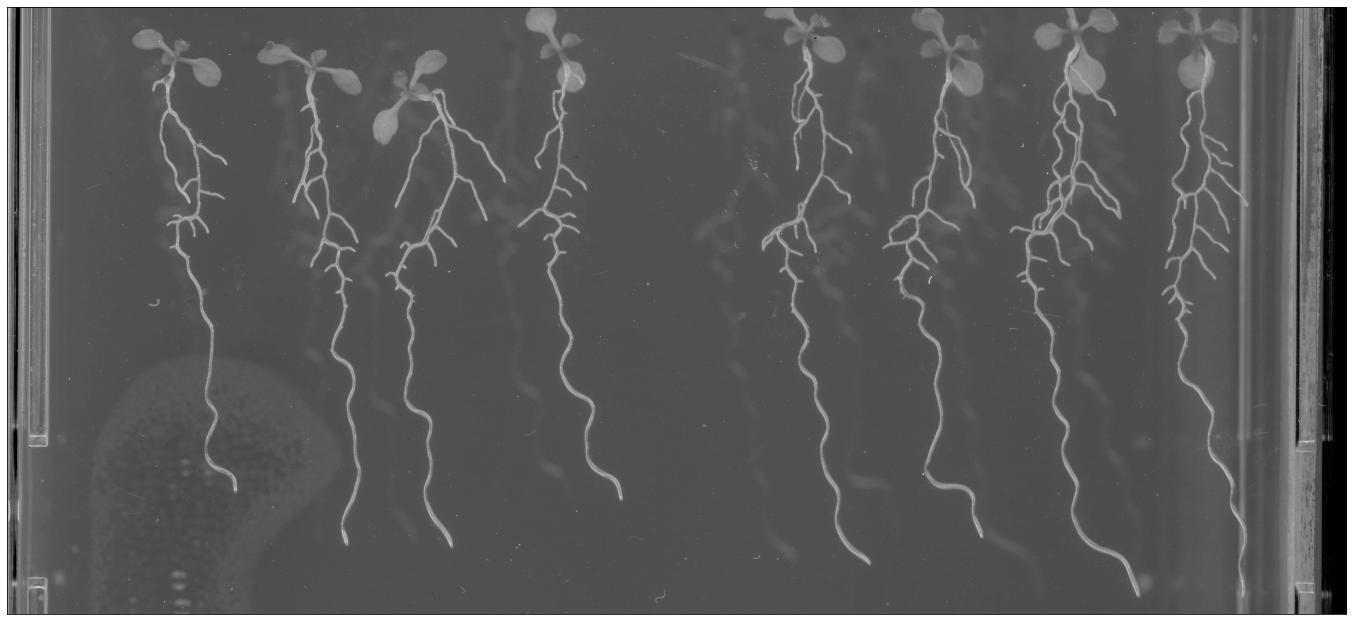

In [5]:
img = Image.open('./source_images/roots1.png')
img = np.array(img)[500:2700,:]
img = np.mean(img,axis=2)
print(img.shape)
plt.imshow(img,cmap='gray')

In [5]:
img_norm = img/255.*2.-1

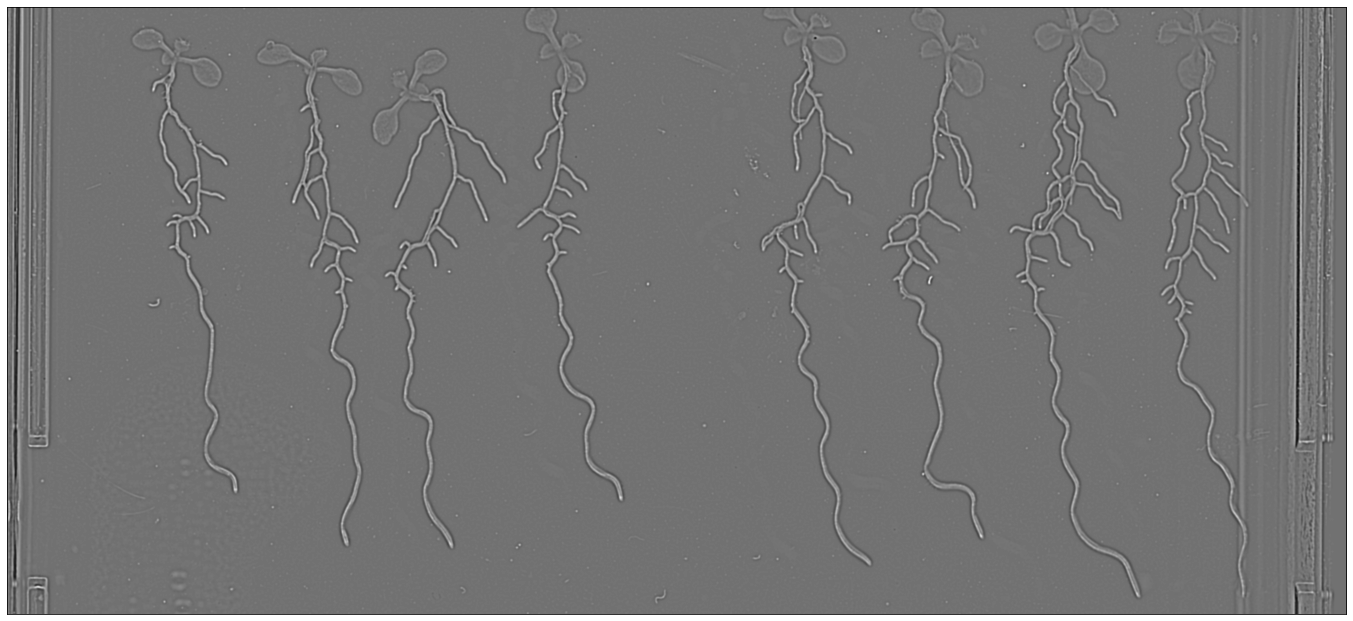

In [6]:
img_max = ski.filters.difference_of_gaussians(img_norm,low_sigma=3,high_sigma=5,mode='nearest')
plt.imshow(img_max,cmap='gray')

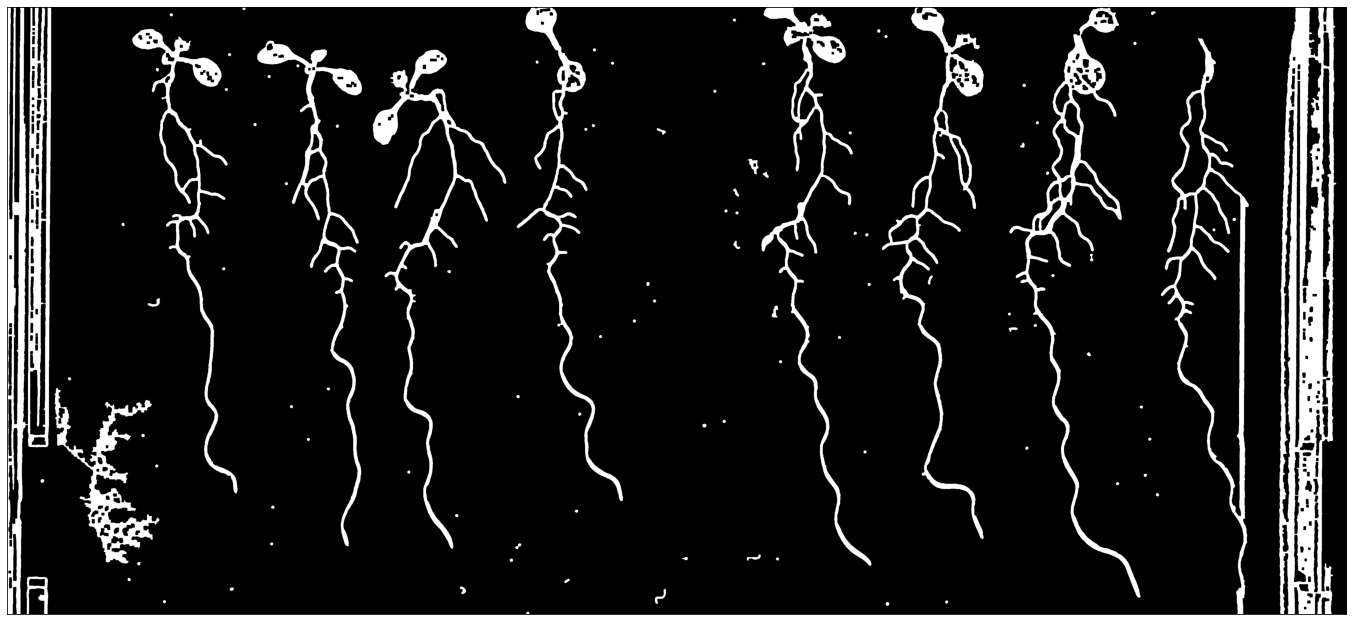

In [18]:
img_mask = ski.filters.apply_hysteresis_threshold(img_max,0.0,0.05)
img_mask = ski.morphology.closing(img_mask,np.ones([9,9]))
plt.imshow(img_mask,cmap='gray')

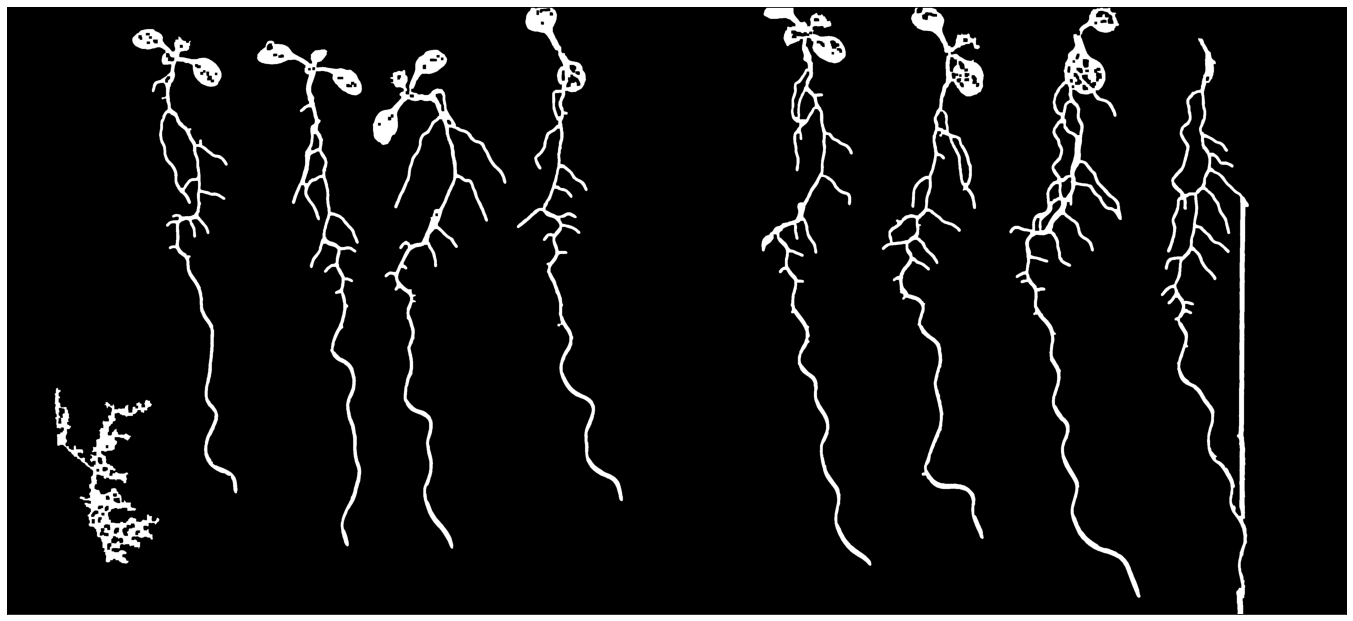

In [19]:
regions = ski.morphology.label(img_mask)

region_sizes = np.bincount(regions.flatten())     

for i,size in enumerate(region_sizes):
    if size < 30000 or size>100000:
        regions[regions==i]=0;

regions = np.clip(regions,0,1)
plt.imshow(regions,cmap='gray')

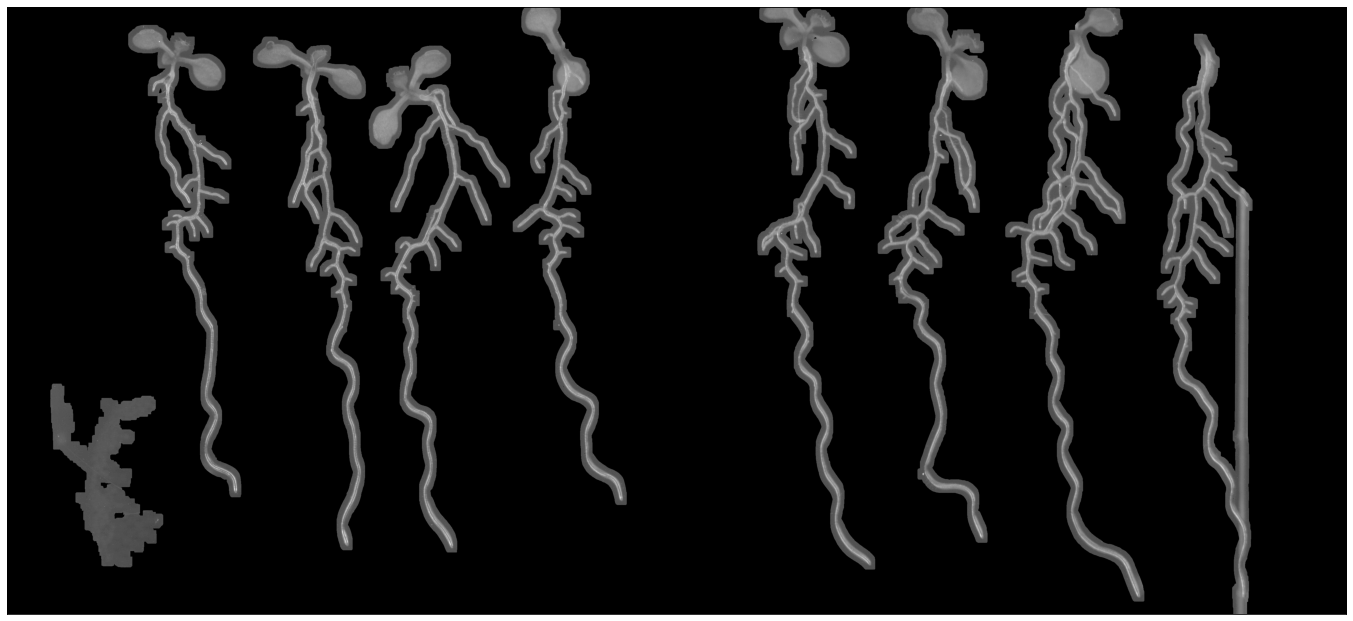

In [20]:
#overlay = ski.filters.gaussian(ski.morphology.dilation(regions,np.ones([3,3])),sigma=5,preserve_range=True)*img
overlay=ski.morphology.dilation(regions,np.ones([30,30]))*img
plt.imshow(overlay,cmap='gray')

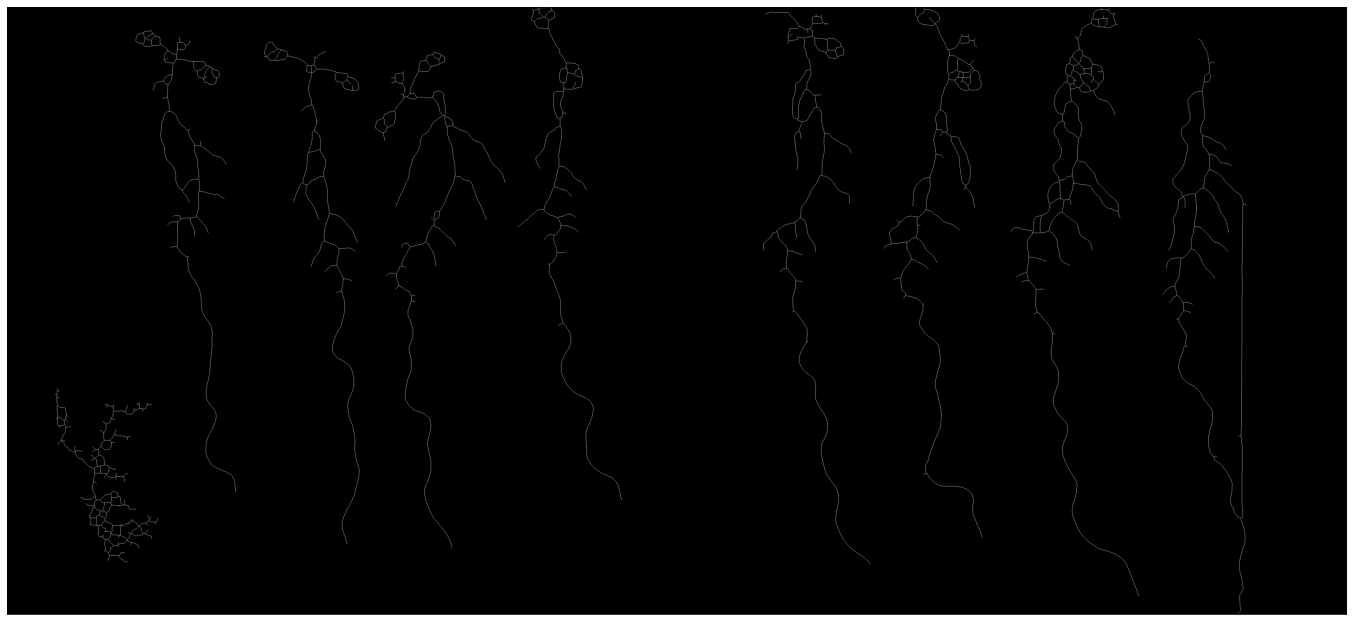

In [21]:
skeleton = ski.morphology.skeletonize(regions)
plt.imshow(skeleton,cmap='gray')

In [11]:
"""
    Next flow idea:
    1. Preprocessing is as follows: image, grayscale norm, GoG, hysteresis treshold, filter by size, skeletonize
    2. Find main root (shortest path from top to bottom), filter by length (exclude shorter than smth)
        a. segmentation
        b. find miny+maxy for each segment
        c. find shortest path from miny to maxy
    3. use GoG and hysteresis tresh, include only things connected to main root
"""

'\n    Next flow idea:\n    1. Preprocessing is as follows: image, grayscale norm, GoG, hysteresis treshold, filter by size, skeletonize\n    2. Find main root (shortest path from top to bottom), filter by length (exclude shorter than smth)\n        a. segmentation\n        b. find miny+maxy for each segment\n        c. find shortest path from miny to maxy\n    3. use GoG and hysteresis tresh, include only things connected to main root\n'